### Import libraries and data
### Celaning data
### Visual data exploration
### Hypothesis
### Reshaping variables
### Creating two data sets (training and test)
### Regression run
### Plot results
### Result interpretation
### Performance statistics
### Comparing predited and actual values
### Interpretation and summary

### Import libraries and data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# import data set
path = r'C:\Users\darii\Documents\12-2023 Airbnb Analysis'
data=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'data_clean.pkl'))

### Cleaning data

##### data used was already cleaned

### Visual data exporation

In [4]:
# data check
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,nan,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


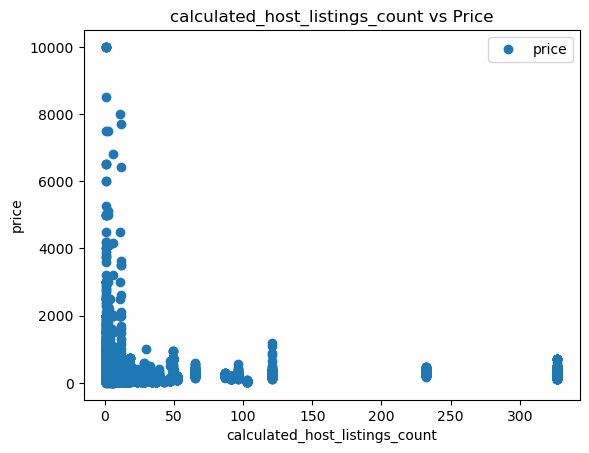

In [6]:
# scatterplot 
data.plot(x = 'calculated_host_listings_count', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('calculated_host_listings_count vs Price')  
plt.xlabel('calculated_host_listings_count')  
plt.ylabel('price')  
plt.show()

### Hypothesis

##### From 6.2: if a host offers more than 110 apartments the price will be more than 106
##### From this scatterplot: the more apartments a host owns, the lower the price

### Reshaping variables

In [7]:
X = data['calculated_host_listings_count'].values.reshape(-1,1)
y = data['price'].values.reshape(-1,1)

In [8]:
# check 
X

array([[6],
       [2],
       [1],
       ...,
       [1],
       [6],
       [1]], dtype=int64)

In [9]:
# check
y

array([[149],
       [225],
       [150],
       ...,
       [115],
       [ 55],
       [ 90]], dtype=int64)

### Creating two data sets (training and test)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression run

In [11]:
# Create a regression object

regression = LinearRegression()

In [12]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [14]:
# Prediction

y_predicted = regression.predict(X_test)

### Plot results

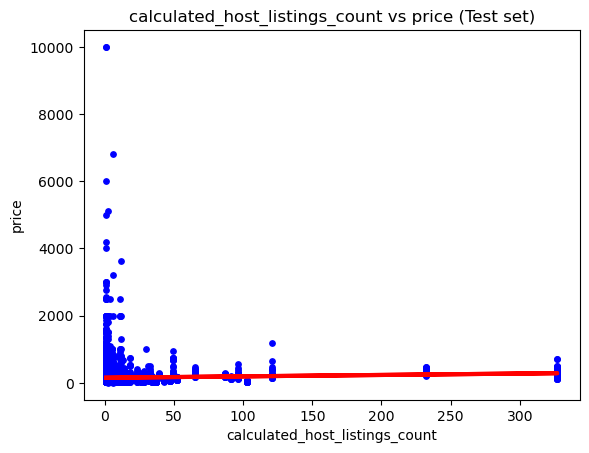

In [15]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('calculated_host_listings_count vs price (Test set)')
plot_test.xlabel('calculated_host_listings_count')
plot_test.ylabel('price')
plot_test.show()

### Results interpretation

##### slightly positive relationship between price and host listings count

### Performance statistics

In [16]:
# Create objects for summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [17]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.41685964]]
Mean squared error:  52935.69552115414
R2 score:  0.003602231084863794


##### very bad evaluation results. Mean square value is too high (taking into the acount data range) and R2 score can be rounded down to 0 and so means that the created model can't at all predict apartment price based on host listings count.

### Comparing predited and actual values

In [18]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(35)

,Actual,Predicted
0,225,149.952971
1,649,149.952971
2,300,150.786690
3,26,151.620409
4,125,149.952971
5,49,149.952971
6,100,149.952971
7,175,149.952971
8,85,149.952971
9,70,149.952971


### Interpretation and summary

##### Created model doesn't suit the data set and can't predict prices of apartments based on host listings count. This means other factor(s)  - independent variable(s) - can have influence.
##### Possibly presented collection (assuming hosts need to consent gathering the data) and measurement (rounding up or down) bias could have only slightly influenced the results of this analysis.